# Code along for blog

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [41]:
df = pd.read_csv('../../../data/raw/telecom_churn_data')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [43]:
cols = []
for col in df.columns:
    col = col.replace(' ', '_')
    cols.append(col)
cols

['state',
 'account_length',
 'area_code',
 'phone_number',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'churn']

In [44]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [45]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [46]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account_length            3333 non-null int64
area_code                 3333 non-null int64
phone_number              3333 non-null object
international_plan        3333 non-null object
voice_mail_plan           3333 non-null object
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64

In [48]:
for col in df.columns:
    print(f"{col} vals:  {df[col].unique()}")

state vals:  ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
account_length vals:  [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account_length            3333 non-null int64
area_code                 3333 non-null int64
phone_number              3333 non-null object
international_plan        3333 non-null object
voice_mail_plan           3333 non-null object
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64

In [50]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [51]:
df.state.value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NC     68
NJ     68
NV     66
CO     66
WA     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

We actually have 3 categorical variables which we will dummy out:

Let's first get our target varialbe out from the data:

In [63]:
y = df.churn

In [64]:
X = df.drop("churn", axis=1)

In [65]:
X

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


Create dummy variables

the phone number is an obejct so it will be dummied if we leave it in the data

the phone number should have no bearing on churn so we'll just drop this from the dataset

actually we won't drop it just yet, we'll just change the type to int

no we'll drop it.  at first I didn't want to drop it because I thought it might be the only identifier but now I think we just have the index column to identify which should be fine. 

we're not dropping entries, just the whole column 

In [66]:
X = X.drop('phone_number', axis = 1)

In [67]:
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [68]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_yes,voice_mail_plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
account_length            3333 non-null int64
area_code                 3333 non-null int64
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64
customer_service_calls    3333 non-null int64
state_AL                  3333 non-null uint8
state_AR                  3333 non-null uint8
state_AZ                  3333 non-null uint8
sta

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 15)

# First Shitty Model - base tree model:

In [179]:
# Instantiate and fit a DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5) 
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [180]:
recall_score(y_test, dtc.predict(X_test))

0.6260162601626016

In [181]:
print(accuracy_score(y_test, dtc.predict(X_test)))

0.9328537170263789


In [182]:
print(recall_score(y_train, dtc.predict(X_train)))
print(accuracy_score(y_train, dtc.predict(X_train)))

0.7388888888888889
0.9559823929571829


In [183]:
y_train.value_counts()

False    2139
True      360
Name: churn, dtype: int64

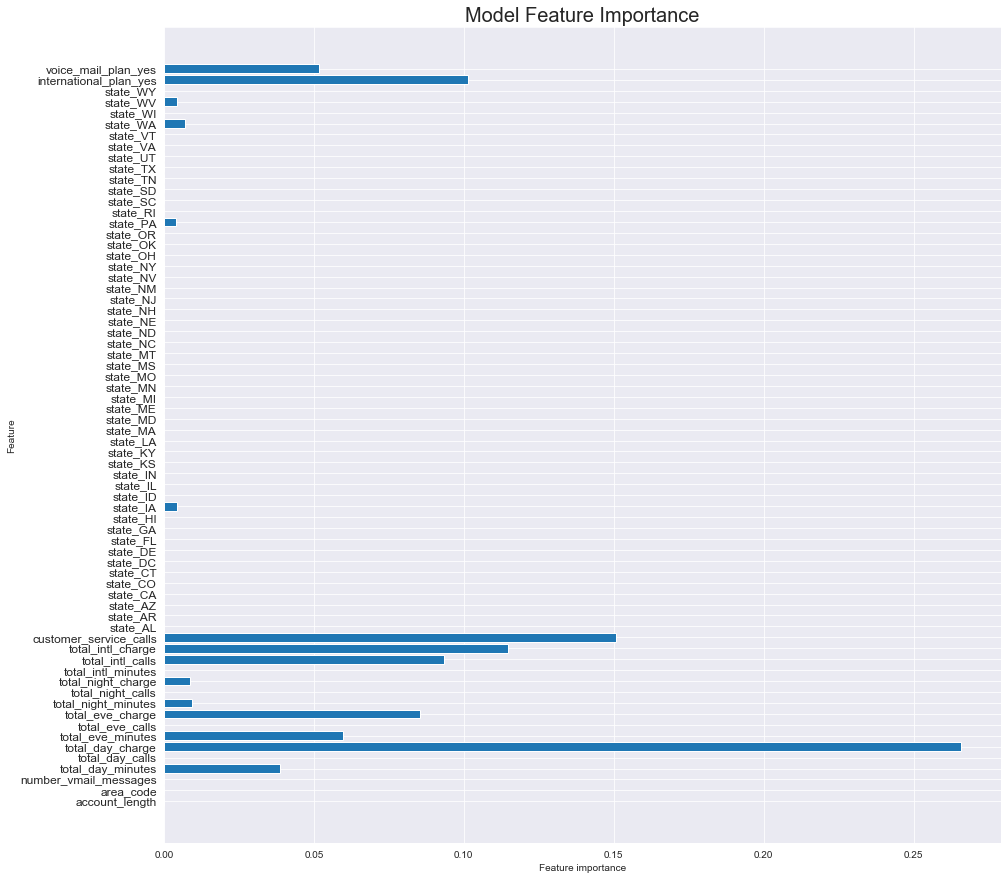

In [184]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_) 
    plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 12) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('Model Feature Importance', fontsize = 20)

plot_feature_importances(dtc)

In [185]:
col_importance = list(zip(X.columns, dtc.feature_importances_))

In [186]:
col_importance

[('account_length', 0.0),
 ('area_code', 0.0),
 ('number_vmail_messages', 0.0),
 ('total_day_minutes', 0.038789196385540486),
 ('total_day_calls', 0.0),
 ('total_day_charge', 0.2658161992163548),
 ('total_eve_minutes', 0.05960010828741192),
 ('total_eve_calls', 0.0),
 ('total_eve_charge', 0.08548321484470632),
 ('total_night_minutes', 0.00928488573070861),
 ('total_night_calls', 0.0),
 ('total_night_charge', 0.0088740685569262),
 ('total_intl_minutes', 0.0),
 ('total_intl_calls', 0.09354223927921732),
 ('total_intl_charge', 0.11473048415743457),
 ('customer_service_calls', 0.15082318205276923),
 ('state_AL', 0.0),
 ('state_AR', 0.0),
 ('state_AZ', 0.0),
 ('state_CA', 0.0),
 ('state_CO', 0.0),
 ('state_CT', 0.0),
 ('state_DC', 0.0),
 ('state_DE', 0.0),
 ('state_FL', 0.0),
 ('state_GA', 0.0),
 ('state_HI', 0.0),
 ('state_IA', 0.004321726505661292),
 ('state_ID', 0.0),
 ('state_IL', 0.0),
 ('state_IN', 0.0),
 ('state_KS', 0.0),
 ('state_KY', 0.0),
 ('state_LA', 0.0),
 ('state_MA', 0.0),
 

## random forest model:

In [187]:
# Instantiate and fit a RandomForestClassifier
rft = RandomForestClassifier(n_estimators=100, max_depth= 5)
rft.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [200]:
accuracy_score(y_test, rft.predict(X_test) )

0.86810551558753

In [189]:
recall_score(y_test, rft.predict(X_test))

0.10569105691056911

In [190]:
print(accuracy_score(y_train, rft.predict(X_train)))
print(recall_score(y_train, rft.predict(X_train)))

0.8855542216886755
0.20555555555555555


## adaboost model:

In [201]:
# Instantiate an AdaBoostClassifier
abc = AdaBoostClassifier(random_state = 15)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=15)

In [202]:
accuracy_score(y_test, abc.predict(X_test))

0.86810551558753

In [203]:
recall_score(y_test, abc.predict(X_test))

0.3333333333333333

In [204]:
print(accuracy_score(y_train, abc.predict(X_train)))
print(recall_score(y_train, abc.predict(X_train)))

0.8979591836734694
0.4638888888888889


## gradient boost model

In [205]:

gbc = GradientBoostingClassifier(random_state = 15)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=15, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [206]:
accuracy_score(y_test, gbc.predict(X_test))

0.9508393285371702

In [207]:
recall_score(y_test, gbc.predict(X_test))

0.7235772357723578

In [208]:
print(accuracy_score(y_train, gbc.predict(X_train)))
print(recall_score(y_train, gbc.predict(X_train)))

0.9731892757102841
0.8194444444444444


# Class imbalance:

In [209]:
y.value_counts()

False    2850
True      483
Name: churn, dtype: int64